<a href="https://colab.research.google.com/github/SebastianYanezV/ADA-Informes/blob/main/Informe_4_QuickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Descripción del problema: Problema de ordenamiento

**Entrada:** Lista o arreglo de "n" números $[a_1, a_2, ..., a_n]$

**Salida:** La lista o arreglo de la entrada, pero ahora ordenada: $[a_1',a_2',...,a_n']$, de forma que $a_1'\leq a_2' \leq... \leq a_n'$.

El problema que se quiere resolver en este caso, es el problema de ordenamiento, el cual consiste en ordenar de menor a mayor una secuencia de "n" números en desorden. Para poder resolver este problema, se usará el algoritmo *QuickSort*, que como su nombre lo indica, es considerado uno de los algoritmos de ordenamiento más rápido que existen.

# 2. QuickSort

## 2.1 Código

El código que se muestra a continuación pertenece al algoritmo *QuickSort*, el cual contiene las funciones *quickSort* y *partition*.

Nota: a continuación se usarán tres tipos de funciones *partition* distintas.

### 2.1.1 QuickSort con función partition que selecciona como pivote al último elemento del arreglo.

In [109]:
comparaciones = 0

def partitionFinal(A, inicio, final, verbose = False):
  if verbose == True: print("El arreglo entra al partition.")
  i = -1
  j = 0
  pivote = A[final]

  if verbose == True: print("Pivote utilizado:", pivote)

  global comparaciones

  while(True):
    if(j == final): 
      break
    if(A[j] > pivote): 
      comparaciones += 1
      j += 1
    else:
      comparaciones += 1
      aux = A[j]
      A[j] = A[i + 1]
      A[i + 1] = aux
      i += 1
      j += 1
    if verbose == True: print("Arreglo durante partition:", A[inicio:final+1])
  
  aux = A[final]
  A[final] = A[i + 1]
  A[i + 1] = aux

  if verbose == True: print("Indice i =", i, "/ Indice j =", j)
  if verbose == True: print("Se intercambia el pivote a la posicion", i+1, "del arreglo original.")

  q = i + 1
  return q


def quickSort1(A, inicio, final, verbose = False):
  if(inicio < final):
    q = partitionFinal(A, inicio, final)
    if verbose == True: print("Arreglo al salir del partition:", A)
    if verbose == True: print("Posicion retornada por el partition:", q)
    if verbose == True: print("Primer sub arreglo en ordenarse:", A[inicio:q])
    quickSort1(A, inicio, q - 1)
    if verbose == True: print("Segundo sub arreglo en ordenarse:", A[q+1:final+1])
    if verbose == True: print("-------------------------------------------------------")
    quickSort1(A, q + 1, final)

#Ejemplo
A = [1, 6, 3, 10, 8, 2]
print("Arreglo original:", A)
quickSort1(A, 0, len(A) - 1)
print("Arreglo ordenado:", A)
print("Comparaciones función Partition:", comparaciones)

Arreglo original: [1, 6, 3, 10, 8, 2]
Arreglo ordenado: [1, 2, 3, 6, 8, 10]
Comparaciones función Partition: 15


### 2.1.2 QuickSort con función partition que selecciona como pivote al primer elemento del arreglo.

In [110]:
comparaciones = 0

def partitionInicio(A, inicio, final):
  i = final + 1
  j = final
  pivote = A[inicio]

  global comparaciones

  while(True):
    if(j == inicio): 
      break
    if(A[j] < pivote): 
      comparaciones += 1
      j -= 1
    else:
      comparaciones += 1
      aux = A[j]
      A[j] = A[i - 1]
      A[i - 1] = aux
      i -= 1
      j -= 1
  
  aux = A[inicio]
  A[inicio] = A[i - 1]
  A[i - 1] = aux

  q = i - 1
  return q


def quickSort2(A, inicio, final):
  if(inicio < final):
    q = partitionInicio(A, inicio, final)
    quickSort2(A, inicio, q - 1)
    quickSort2(A, q + 1, final)

#Ejemplo
A = [1, 6, 3, 10, 8, 2]
print("Arreglo original:", A)
quickSort2(A, 0, len(A) - 1)
print("Arreglo ordenado:", A)
print("Comparaciones función Partition:", comparaciones)

Arreglo original: [1, 6, 3, 10, 8, 2]
Arreglo ordenado: [1, 2, 3, 6, 8, 10]
Comparaciones función Partition: 11


### 2.1.3 QuickSort con función partition que selecciona como pivote la mediana de tres elementos al azar del arreglo.

In [112]:
import random
comparaciones = 0

def partitionRandom(A, inicio, final, verbose = True):
  auxA = []
  for i in range(len(A)):
    auxA.append(A[i])
  
  elem1 = random.choice(auxA)
  auxA.remove(elem1)
  elem2 = random.choice(auxA)
  auxA.remove(elem2)
  elem3 = random.choice(auxA)

  arregloDe3 = [elem1, elem2, elem3]
  arregloDe3.sort()
  pivote = arregloDe3[1]

  pos = A.index(pivote)

  aux = A[final]
  A[final] = pivote
  A[pos] = aux

  global comparaciones

  i = -1
  j = 0

  while(True):
    if(j == final): 
      break
    if(A[j] > pivote): 
      comparaciones += 1
      j += 1
    else:
      comparaciones += 1
      aux2 = A[j]
      A[j] = A[i + 1]
      A[i + 1] = aux2
      i += 1
      j += 1
  
  aux2 = A[final]
  A[final] = A[i + 1]
  A[i + 1] = aux2

  q = i + 1
  return q

def quickSort3(A, inicio, final, verbose = True):
  if(inicio < final):
    q = partitionRandom(A, inicio, final)
    quickSort3(A, inicio, q - 1)
    quickSort3(A, q + 1, final)

#Ejemplo
A = [1, 6, 3, 10, 8, 2]
print("Arreglo original:", A)
quickSort3(A, 0, len(A) - 1)
print("Arreglo ordenado:", A)
print("Comparaciones función Partition:", comparaciones)

Arreglo original: [1, 6, 3, 10, 8, 2]
Arreglo ordenado: [1, 2, 3, 6, 8, 10]
Comparaciones función Partition: 26


## 2.2 Descripción del algoritmo

Antes de empezar a ordenar, el algoritmo recibe una lista o arreglo de "n" números en orden aleatorio, los que deberá ordenar a continuación.

En primer lugar, trabaja la función *Partition* (a continuación se explicará el funcionamiento de la función *partition* que selecciona como pivote al último elemento del arreglo, sin embargo, las tres funciones *partition* implementadas funcionan de forma similar).

1. La función recibe el arreglo con el que se va a trabajar y sus índices inicial y final.

2. Se crean e inicializan dos sub índices con los que se recorrerá y reorganizará el arreglo (i = -1, j = 0). Se asigna como pivote al último elemento del arreglo.

3. Luego, en cada iteración, se debe ir reorganizando el arreglo (sin usar una estructura auxiliar) de forma que se va comparando al elemento de la posición "j" con el pivote:

    3.1. Si el primero es mayor, el sub índice "j" avanza una posición.

    3.2. Si es menor o igual, se intercambia el elemento de la posición "j" con el elemento siguiente al de la posición "i". Ambos sub índices avanzan una posición.

4. El paso anterior se repite hasta que el sub índice "j" llega a la posición del pivote, en ese momento, el pivote cambia posición con el elemento de la posición "i + 1".

5. Finalmente se retorna la posición en la que quedó el pivote.

Luego de que la función *partition* reordena al arreglo, la función *quickSort* es llamada.

1. La función se llama recursivamente, sólo que ahora trabaja con el arreglo por la mitad. Para el lado izquierdo, trabaja con el sub arreglo que va desde el inicio hasta la posición anterior en la que quedó el pivote al final del *partition*. Para el lado derecho, trabaja con el sub arreglo que va desde la posición siguiente en la que quedó el pivote, hasta el final del arreglo.

2. Luego de llamarse recursivamente, la función *partition* será la encargada de reordenar nuevamente al nuevo arreglo.

3. Los pasos anteriores ocurren hasta que el arreglo quede completamente ordenado.

Finalmente, al terminar el proceso anteriormente descrito, el algoritmo retorna el arreglo de entrada ordenado de menor a mayor.

## 2.3 Ejemplo

Se llama al siguiente arreglo:

A = [1, 6, 3, 10, 8, 2]

Se entra a la función *partition* y se inicializan variables:

i = -1, j = 0, pivote = 2

La función *partition* empieza a iterar:

1. Se compara A[j] con el pivote: 1 < 2. 

    A[j] es menor por lo que se intercambia con A[i+1].

    A = [1, 6, 3, 10, 8, 2] (el arreglo se mantiene porque al ser el primer elemento no se puede intercambiar con nadie)

    i = 0, j = 1

2. Se compara A[j] con el pivote: 6 > 2. 

    A[j] es mayor por lo que solo se aumenta el indice j.

    A = [1, 6, 3, 10, 8, 2]

    i = 0, j = 2

3. Se compara A[j] con el pivote: 3 > 2.

    A[j] es mayor por lo que solo se aumenta el indice j.

    A = [1, 6, 3, 10, 8, 2]

    i = 0, j = 3

4. Se compara A[j] con el pivote: 10 > 2.

    A[j] es mayor por lo que solo se aumenta el indice j.

    A = [1, 6, 3, 10, 8, 2]

    i = 0, j = 4

5. Se compara A[j] con el pivote: 8 > 2.

    A[j] es mayor por lo que solo se aumenta el indice j.

    A = [1, 6, 3, 10, 8, 2]

    i = 0, j = 5

6. El índice j llegó al final del arreglo, por lo que se termina de iterar. Se intercambia el pivote por A[i+1] y se retorna "i+1" como resultado del partition.

    A = [1, 2, 3, 10, 8, 6]

    Se retorna el valor 1 como elemento partition.

7. Se llama de forma recursiva a la función *quickSort* y se le traspasa el sub arreglo [1], para luego traspasarle el sub arreglo [3, 10, 8, 6].

El proceso anterior se repite hasta ordenar completamente el arreglo (cada vez se van ordenando arreglos más pequeños, esto debido a que el elemento que se obtiene como partition se usa para ir sub dividiendo el arreglo). 

Finalmente se retorna el arreglo ordenado A = [1, 2, 3, 6, 8, 10]

## 2.4 Ejecución del algoritmo paso a paso

In [63]:
comparaciones = 0
A = [1, 6, 3, 10, 8, 2]
print("Arreglo de entrada:", A)
print("-------------------------------------------------------")
quickSort1(A, 0, len(A) - 1, verbose = True)
print("Arreglo ordenado:", A)
print("Comparaciones función Partition:", comparaciones)

Arreglo de entrada: [1, 6, 3, 10, 8, 2]
-------------------------------------------------------
El arreglo entra al partition.
Pivote utilizado: 2
Arreglo durante partition: [1, 6, 3, 10, 8, 2]
Arreglo durante partition: [1, 6, 3, 10, 8, 2]
Arreglo durante partition: [1, 6, 3, 10, 8, 2]
Arreglo durante partition: [1, 6, 3, 10, 8, 2]
Arreglo durante partition: [1, 6, 3, 10, 8, 2]
Indice i = 0 / Indice j = 5
Se intercambia el pivote a la posicion 1 del arreglo original.
Arreglo al salir del partition: [1, 2, 3, 10, 8, 6]
Posicion retornada por el partition: 1
Primer sub arreglo en ordenarse: [1]
Segundo sub arreglo en ordenarse: [3, 10, 8, 6]
-------------------------------------------------------
El arreglo entra al partition.
Pivote utilizado: 6
Arreglo durante partition: [3, 10, 8, 6]
Arreglo durante partition: [3, 10, 8, 6]
Arreglo durante partition: [3, 10, 8, 6]
Arreglo durante partition: [3, 10, 8, 6]
Arreglo durante partition: [3, 10, 8, 6]
Indice i = 2 / Indice j = 5
Se intercam

Como se puede ver en el ejemplo anterior, cada vez que el arreglo entra a la función *partition*, se selecciona como pivote al último elemento del arreglo. Luego, al terminar de iterar en el *partition*, el pivote cambia su posición con el elemento de la posición "i + 1" y esta posición se retorna como un separador para trabajar con dos partes distintas del arreglo en la siguiente llamada recursiva. El procedimiento anterior se repite hasta que el arreglo queda completamente ordenado.

# 3. Tiempo de ejecución

## Teorema: tiempo de ejecución

El algoritmo *QuickSort* tiene un tiempo de ejecución de $O(n^2)$ en su **peor caso** y un tiempo de $O(n log n)$ en su **caso promedio**.

## Prueba del teorema

El algoritmo *QuickSort*, al ser un algoritmo recursivo (en el que cada vez el arreglo llamado a la función se divide en dos partes), tiene un tiempo de ejecución promedio de $O(n log n)$, esto para cuándo el pivote elegido en la función *partition* es la mediana del arreglo o un número cercano a esta. Sin embargo, este algoritmo también se caracteriza por la posibildad de bajar su rendimiento de tiempo de ejecución hasta un $O(n^2)$, caso que ocurre cuando el arreglo de entrada se encuentra ordenado de menor a mayor.

A continuación se verificará que el **teorema maestro** se puede utilizar para encontrar el tiempo de ejecución promedio de este algoritmo.

1. Antes de utilizar este teorema, es necesario verificar que la función de recurrencia de este algoritmo es de la forma $T(n) = aT(n/b) + f(n^d)$.

2. En este algoritmo, si se considera el mejor caso o caso promedio, el problema se divide cada vez en 2 sub problemas de tamaño 1/2 del problema original de forma recursiva. Además, la función *partition* tiene un tiempo de ejecución de $O(n)$.

3. Al saber lo anterior, se puede concluir que la función de recurrencia de *QuickSort* para su mejor caso y caso promedio es de la forma $T(n) = 2T(n/2) + O(n)$, por lo que se puede utilizar el teorema maestro para encontrar el tiempo de ejecución de este algoritmo.

A continuación se utilizará el **teorema maestro** para probar el teorema de tiempo de ejecución de este algoritmo.

1. Para encontrar el tiempo de ejecución, primero debemos visualizar las variables $a$, $b$ y $d$ en la función de recurrencia. En este caso son 2, 2 y 1 respectivamente.

2. Luego hay que evaluar si $a$ es igual, menor o mayor que $b^d$. Reemplazamos y queda que 2 = 2.

3. Finalmente, se reemplaza de nuevo en el tiempo de ejecución $O(n^d log n)$ y da que es igual a $O(n log n)$.

Finalmente, gracias al teorema maestro, se puede verificar que el tiempo de ejecución del algoritmo *QuickSort* es igual a $O(n log n)$, por lo que su teorema de ejecución es correcto.

# 4. Correctitud

## Teorema: correctitud de la función Partition

La función *Partition* recibe un arreglo A[p..r], lo reorganiza y retorna un índice "q" de tal forma que los elementos del arreglo A[p..q-1] son menores o iguales a A[q] y los elementos del arreglo A[q+1..r] son mayores a A[q].

## Prueba del teorema

A continuación se utilizará la **propiedad invariante de bucle** de la función *partition* para probar su teorema de correctitud. Su propiedad invariante de bucle es la siguiente:

"Al comienzo de cada iteración, se cumple que para cualquier índice "k":

Si $p ≤ k ≤ i$, entonces $A[k] ≤ A[r]$

Si $i < k < j$, entonces $A[k] > A[r]$"

**Inicialización**

Antes de la primera iteración, el índice i = -1 y j = 0, por lo que "k" sólo puede ser menor que 0. Esto significa que tanto $A[k] ≤ A[r]$ como $A[k] > A[r]$ están vacíos (debido a que "k" no es un índice válido para el arreglo). Luego, durante la primera iteración, se comparará el elemento de la posición "j" con el pivote y luego, dependiendo del resultado de la comparación, el elemento de la posición "j" será agregado al conjunto que va desde "p" hasta "i" o al conjunto que va desde "i" hasta "j", dependiendo de si este es menor o mayor que el pivote.

**Mantención**

Después de la n-ésima iteración, el índice "j" será igual a "n - 1" y se cumplirá que $i < j < r$, entonces para el conjunto de los números A[k] con $p ≤ k ≤ i$, este contendrá $(i - p) + 1$ elementos $A[k] ≤ A[r]$ y para el conjunto $i < k < j$ el conjunto contendrá $(j - i) + 1$ elementos $A[k] > A[r]$.

**Correctitud**

Finalmente, al ser correctas tanto la inicialización como la mantención y al reorganizar el arreglo de entrada y retornar el índice "q" que lo divide en un lado con elementos menores a este y otro con elementos mayores a este, se concluye que el teorema de correctitud de la función *Partition* es correcto.


## Teorema: correctitud del algoritmo QuickSort

El algoritmo *QuickSort* reorganiza el arreglo de entrada y lo deja ordenado de menor a mayor. El arreglo $[a_1',a_2',...,a_n']$, queda ordenado de forma que $a_1'\leq a_2' \leq... \leq a_n'$.

## Prueba del teorema

Debido a que este algoritmo es uno del tipo recursivo, para poder comprobar el teorema anterior se deberá utilizar inducción matemática.

**Caso base (n = 1)**

Cuándo el arreglo de entrada es de tamaño 1, este sale automáticamente del algoritmo debido a que "inicio" no puede ser menor que "final". Al ser un arreglo de sólo un elemento, este ya se encuentra ordenado.

**Paso inductivo (n > 1)**

Se asume que *QuickSort* es correcto para casos m < n. Cuándo el arreglo de entrada es de un tamaño n > 1, el algoritmo encuentra un pivote y luego procesa, sin necesidad de una estructura auxiliar, al arreglo de entrada de forma recursiva. Lo anterior, de forma que primero reorganiza al arreglo desde su inicio hasta antes del pivote y luego desde después del pivote hasta el final. Como el algoritmo ordena cada sección del arreglo pese a que estas tienen un tamaño m < n, se asume que el paso inductivo es correcto.

**Correctitud**

Finalmente, como el caso base y paso inductivo son correctos, y sabiedo que la función *partition* va reorganizando los arreglos que recibe, se concluye que el teorema de correctitud del algoritmo es correcto.

# 5. Experimentos

## 5.1 Cantidad de comparaciones

A continuación se muestra una gráfica en la que se comparan la cantidad de comparaciones entre el mejor caso y peor caso del algoritmo para tamaños de problemas con n ∈ [5, 19].

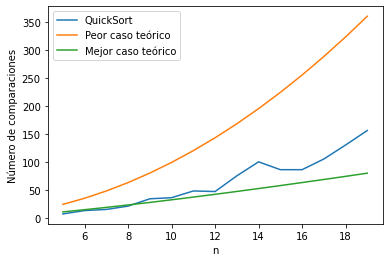

In [113]:
import matplotlib.pyplot as plt
import math

x=[n for n in range(5,20)] 
y1=[n * n for n in range(5,20)] # Peor caso
y2=[n * math.log2(n) for n in range(5,20)] # Mejor caso
y=[]; 

for n in range(5,20):
  a = random.sample(range(1, 100), n)
  comparaciones = 0
  quickSort1(a, 0, len(a)-1)
  y.append(comparaciones)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["QuickSort", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel('n')
plt.ylabel('Número de comparaciones')
plt.show()

### Análisis de resultados

En el gráfico se puede apreciar que el mejor caso realiza $O(n log n)$ comparaciones, a diferencia del peor caso, el cuál realiza $O(n^2)$. Esto se debe a que en el mejor caso teórico, el arreglo siempre se trabajará como dos mitades del mismo tamaño o tamaño similar, mientras que en el peor caso, se trabajará con dos mitades, solo que una será de largo "n - 1" (n = largo del arreglo) y la otra será de largo 1, lo que producirá una mayor cantidad de comparaciones para llegar a ordenar el arreglo.

## 5.2 QuickSort v/s MergeSort

### 5.2.1 Cantidad de comparaciones

A continuación se muestran dos gráficos en los que se comparan la cantidad de comparaciones promedio entre los algoritmos *QuickSort* y *MergeSort* para tamaños de problemas con n ∈ [5, 99].

In [114]:
comparacionesMergeSort = 0

def Merge(sub1, sub2, verbose = False):
  largo = len(sub1) + len(sub2)
  new = [0] * (largo)
  i = 0 ; j = 0 ; k = 0
  while (len(sub1) > i and len(sub2) > j):
    if (sub1[i] < sub2[j]):
      new[k] = sub1[i]
      i += 1
    else:
      new[k] = sub2[j]
      j += 1
    k += 1
    global comparacionesMergeSort
    comparacionesMergeSort += 1
  while (i < len(sub1)):
    new[k] = sub1[i]
    i += 1
    k += 1
    comparacionesMergeSort += 1
  while (j < len(sub2)):
    new[k] = sub2[j]
    j += 1
    k += 1
    comparacionesMergeSort += 1
  return new

def mergeSort(A, verbose = False):
  if len(A) == 1: return A
  medio = int(len(A)/2)
  sub1 = mergeSort(A[:medio])
  sub2 = mergeSort(A[medio:])
  return Merge(sub1, sub2)

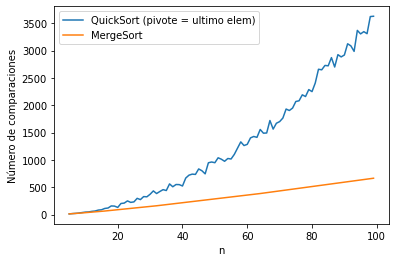

In [115]:
x=[n for n in range(5,100)] 
y=[]; 
z=[];

for n in range(5,100):
  a = random.sample(range(1, 100), n)
  b = random.sample(range(1, 100), n)

  comparaciones = 0
  quickSort1(a, 0, len(a)-1)

  comparacionesMergeSort = 0
  b = mergeSort(b)

  y.append(comparaciones)
  z.append(comparacionesMergeSort)

plt.plot(x,y)
plt.plot(x,z)
plt.legend(["QuickSort (pivote = ultimo elem)", "MergeSort"])

plt.xlabel('n')
plt.ylabel('Número de comparaciones')
plt.show()

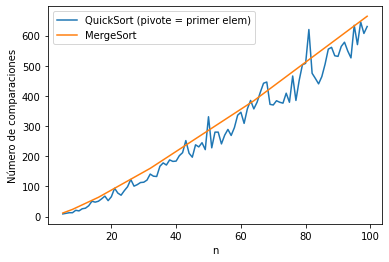

In [116]:
x=[n for n in range(5,100)] 
y=[]; 
z=[];

for n in range(5,100):
  a = random.sample(range(1, 100), n)
  b = random.sample(range(1, 100), n)

  comparaciones = 0
  quickSort2(a, 0, len(a)-1)

  comparacionesMergeSort = 0
  b = mergeSort(b)

  y.append(comparaciones)
  z.append(comparacionesMergeSort)

plt.plot(x,y)
plt.plot(x,z)
plt.legend(["QuickSort (pivote = primer elem)", "MergeSort"])

plt.xlabel('n')
plt.ylabel('Número de comparaciones')
plt.show()

### Análisis de resultados

En los gráficos anteriores se puede apreciar que la cantidad de comparaciones que realiza *QuickSort* depende de la forma en que su función *partition* se haya implementado. 

Para el primer gráfico, se puede ver que pese a que ambos algoritmos tienen un tiempo de ejecución de $O(n log n)$ para sus casos promedios, el *MergeSort* termina por ser más eficiente al momento de trabajar. Lo anterior se puede deber a que sea más probable que la complejidad temporal de *QuickSort* aumente a $O(n^2)$ al usar como pivote al último elemento del arreglo.

Por otro lado, para el segundo gráfico, se puede observar que ambos algoritmos tienen una cantidad bastante similar de comparaciones, probablemente acercándose a un tiempo de ejecución de $O(n log n)$ para ambos algoritmos. Lo anterior se podría deber a que sea una mejor opción escoger como pivote al primer elemento del arreglo en el *QuickSort*.

### 5.2.2 Tiempo de ejecución

En los gráficos que se muestran a continuación se visualizan los tiempos de ejecución de los algoritmos *QuickSort* y *MergeSort* en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 5 y 500.

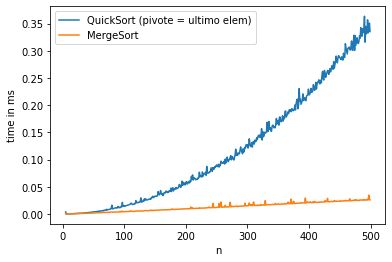

In [117]:
import datetime
from timeit import repeat

x=[]; y=[]
z=[]; w=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces quickSort1 y mergeSort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import quickSort1", stmt=f"quickSort1({a}, {0}, {len(a)-1})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  z.append(n)
  w.append(t2)


plt.plot(x,y)
plt.plot(z,w)
plt.legend(["QuickSort (pivote = ultimo elem)", "MergeSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

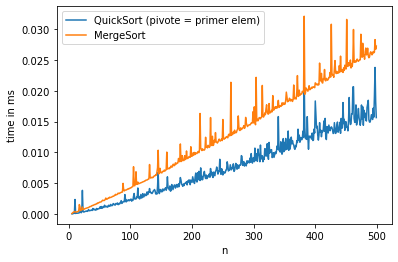

In [118]:
x=[]; y=[]
z=[]; w=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces quickSort2 y mergeSort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import quickSort2", stmt=f"quickSort2({a}, {0}, {len(a)-1})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)

  z.append(n)
  w.append(t2)


plt.plot(x,y)
plt.plot(z,w)
plt.legend(["QuickSort (pivote = primer elem)", "MergeSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

En los gráficos anteriores se puede apreciar que el tiempo de ejecución de *QuickSort* depende de la forma en que su función *partition* se haya implementado.

Si bien ambas implementaciones funcionan bastante rápido, se puede ver claramente que al momento de comparar *QuickSort* y *MergeSort*, el segundo es más rápido si el primero usa un *partition* con pivote al final. Sin embargo, si *QuickSort* utiliza un pivote al inicio, este algoritmo puede llegar a ser un poco más rápido que *MergeSort*.

### Conclusiones generales experimento 5.2

Si bien *QuickSort* es uno de los algoritmos de ordenamiento más rápidos que existen, este puede llegar a ser un poco inestable en su funcionamiento debido a las diferentes funciones de partisión que se le pueden implementar. Por esta razón, se puede concluir que para usar este algoritmo, primero se debería buscar la mejor implementación posible y luego se debería comparar con otros, esto con el fin de saber cuando conviene utilizarlo. 

## 5.3 Rendimiento del algoritmo al usar sus distintas implementaciones

En el gráfico que se muestra a continuación se visualizan los tiempos de ejecución del algoritmo *QuickSort* usando sus tres selecciones de pivote distintas en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 5 y 30.

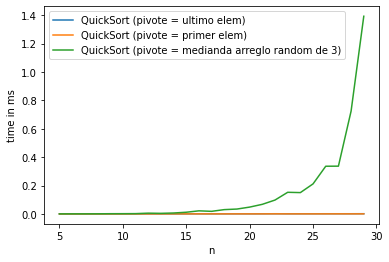

In [121]:
x1=[]; y1=[]
x2=[]; y2=[]
x3=[]; y3=[]

for n in range(5,30):

  a = random.sample(range(1, 1000), n)

  t = repeat(setup="from __main__ import quickSort1", stmt=f"quickSort1({a}, {0}, {len(a)-1})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import quickSort2", stmt=f"quickSort2({a}, {0}, {len(a)-1})", repeat=1, number=10)
  t3 = repeat(setup="from __main__ import quickSort3", stmt=f"quickSort3({a}, {0}, {len(a)-1})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)

  x2.append(n)
  y2.append(t2)

  x3.append(n)
  y3.append(t3)

plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.legend(["QuickSort (pivote = ultimo elem)", "QuickSort (pivote = primer elem)", "QuickSort (pivote = medianda arreglo random de 3)"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

Como se puede ver en el gráfico anterior, si se trata sobre comparar las distintas versiones del algoritmo, claramente se puede apreciar que tanto el pivote al inicio, como al final, hacen que el algoritmo funcione bastante rápido (gracias al experimento 5.2 se cree que el caso del pivote al inicio es aún más eficiente que el pivote al final). Sin embargo, la implementación con un pivote sacado de la mediana de tres elementos al azar del arreglo es extremadamente ineficiente, esto debido a que no hay control alguno sobre que elemento se utiliza como pivote, por lo que el algoritmo puede funcionar bastante mal, llegando incluso a caerse por no dejar de iterar a tiempo (razón por la que sólo se está experimentando hasta arreglos de largo 30).